### **Import Library**

In [2]:
import pandas as pd
import random
import warnings
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn import tree
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import (
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)


warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("darkgrid")

### Visualizing The **Data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

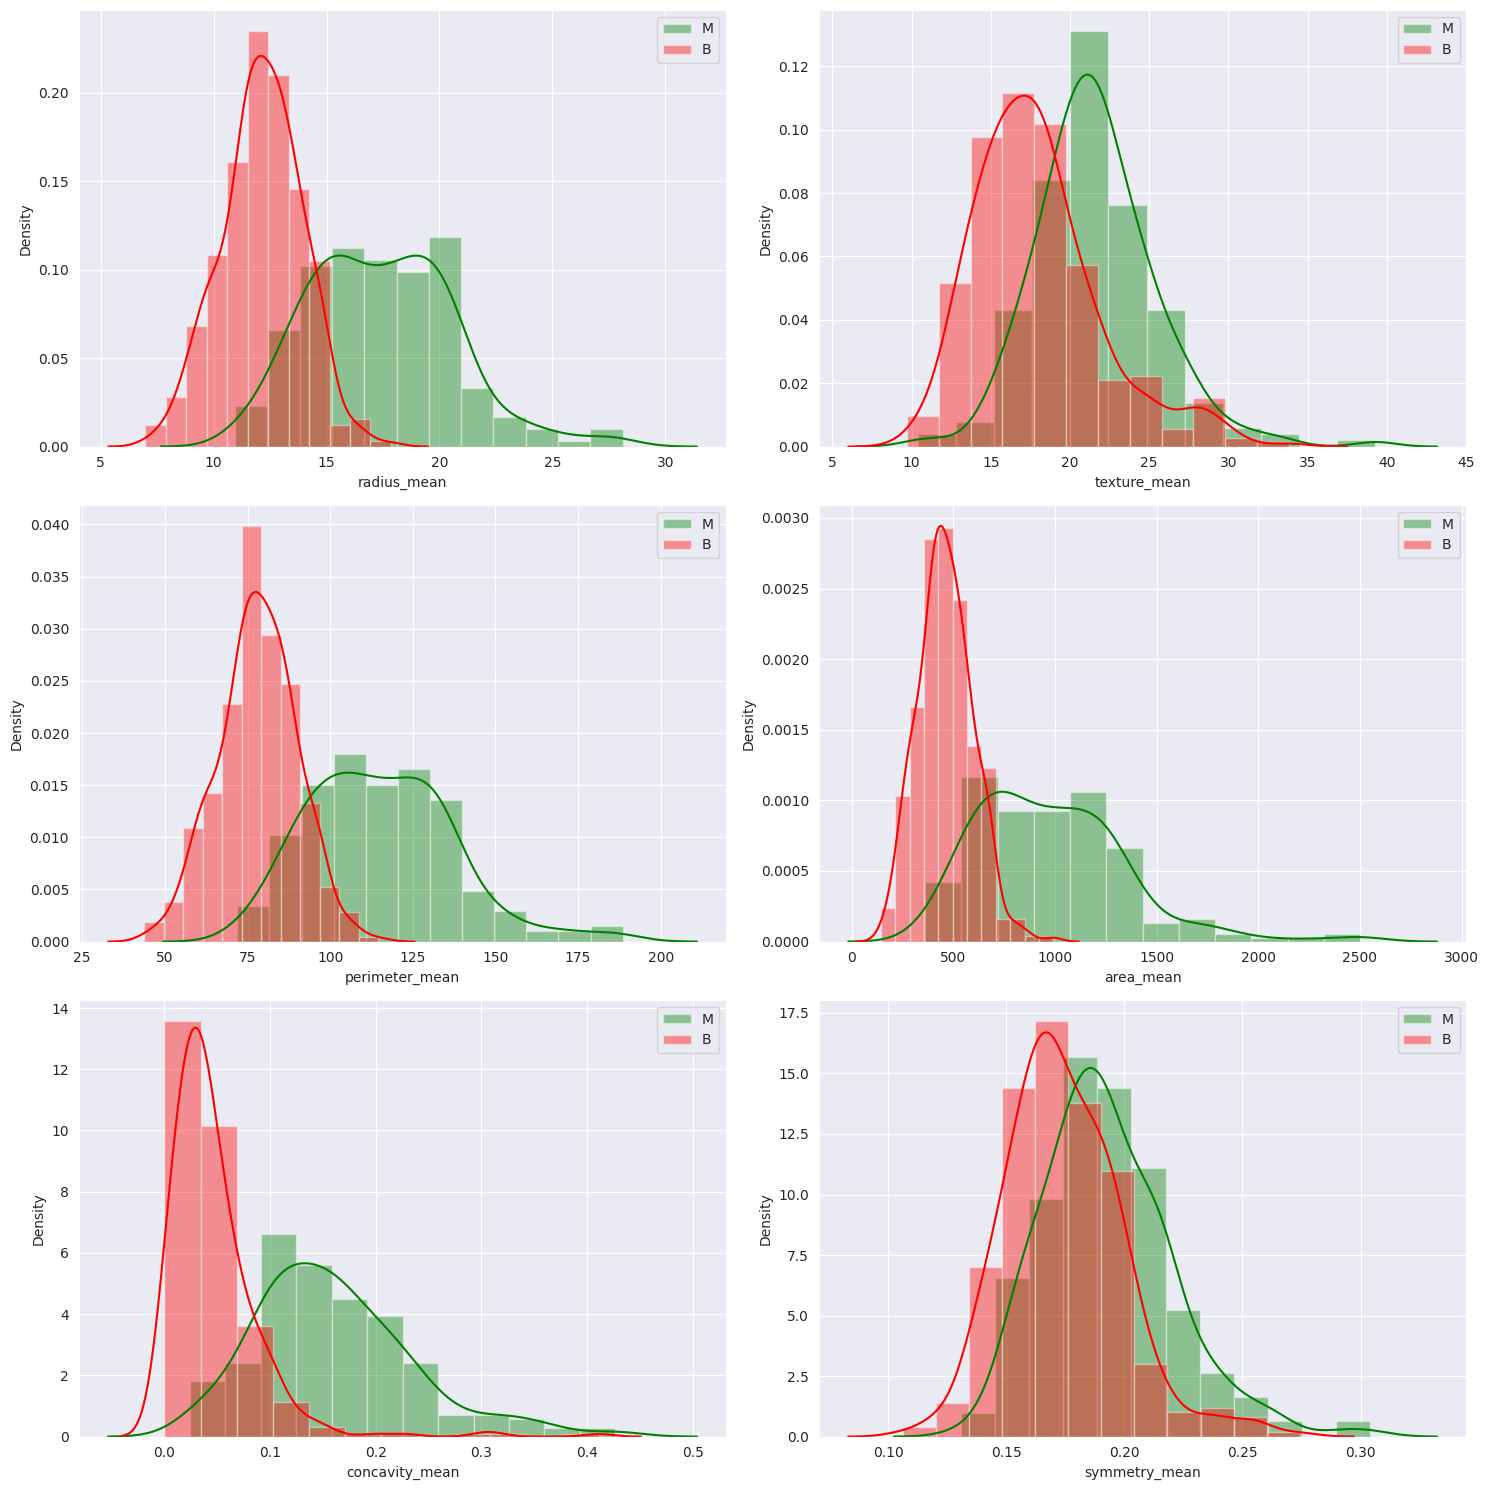

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# breastCancerData = pd.read_csv(url, header=None)
data=pd.read_csv(url)
column_names = data = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
data = pd.read_csv(url, header=None,names=column_names)
data.info()
data.describe()
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(data[data['diagnosis']=='M']['radius_mean'], bins=bins, color='green', label='M')
sns.distplot(data[data['diagnosis']=='B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(data[data['diagnosis']=='M']['texture_mean'], bins=bins, color='green', label='M')
sns.distplot(data[data['diagnosis']=='B']['texture_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(data[data['diagnosis']=='M']['perimeter_mean'], bins=bins, color='green', label='M')
sns.distplot(data[data['diagnosis']=='B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.distplot(data[data['diagnosis']=='M']['area_mean'], bins=bins, color='green', label='M')
sns.distplot(data[data['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.distplot(data[data['diagnosis']=='M']['concavity_mean'], bins=bins, color='green', label='M')
sns.distplot(data[data['diagnosis']=='B']['concavity_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.distplot(data[data['diagnosis']=='M']['symmetry_mean'], bins=bins, color='green', label='M')
sns.distplot(data[data['diagnosis']=='B']['symmetry_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Shape of data: (569, 32)
Statistics of numerical columns:
                 0           2           3           4            5   \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               6           7           8           9           10  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ... 

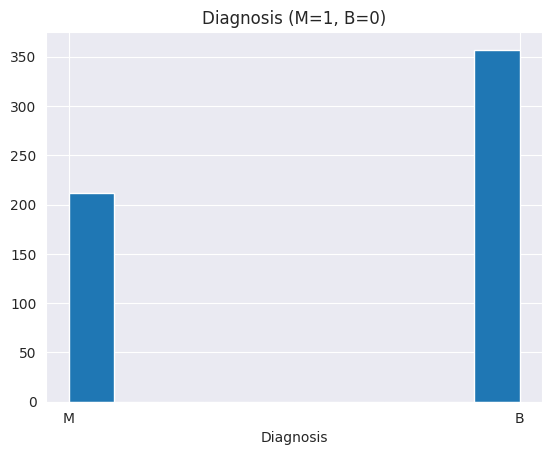

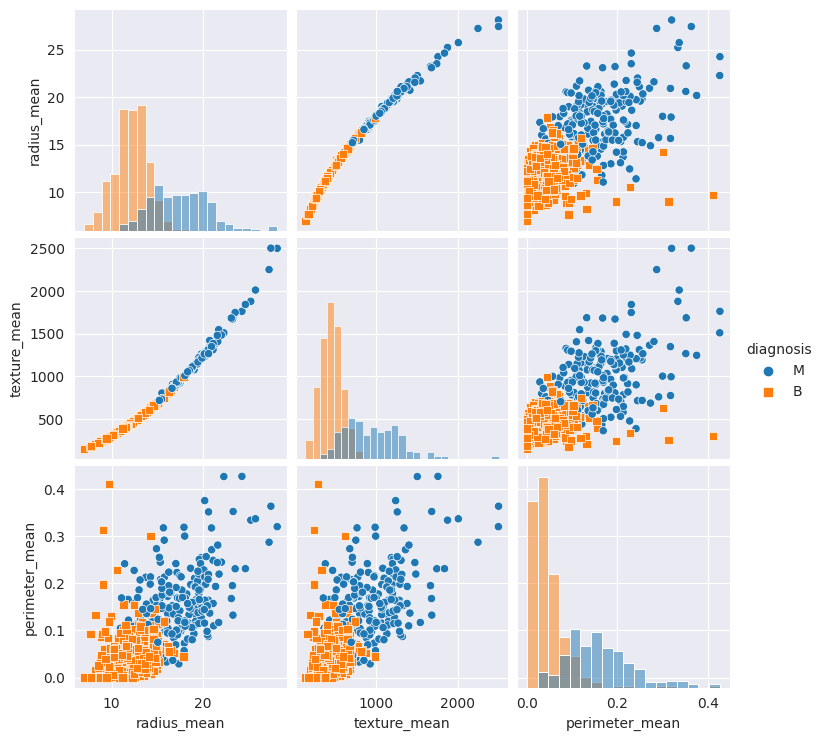

In [5]:
# load the data I used url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None)

# 1. exploratory data analysis (EDA)
df.describe()
print("Shape of data:", df.shape)
print("Statistics of numerical columns:")
print(df.describe())
target_counts = df[1].value_counts()
print("Distribution of target variable:")
print(target_counts)
#get graph 
column_names = ["id", "diagnosis"] + [f"{attr}_{stat}" for attr in ("radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension") for stat in ("mean", "se", "worst")]
df = pd.read_csv(url, header=None, names=column_names)
selected_features = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean"]
plot_data = df[selected_features]
plt.hist(df["diagnosis"])
plt.title("Diagnosis (M=1, B=0)")
plt.xlabel("Diagnosis")
plt.show()


sns.pairplot(plot_data, hue="diagnosis", markers=["o", "s"], diag_kind="hist")
sns.set(style="whitegrid")
plt.show()

### **Neural Network**

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# pd.read_csv(url, header=None)
column_names = data = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
data = pd.read_csv(url, header=None,names=column_names)
# del data['fractal_dimension_worst']

In [7]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Initializing the classifier
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x=X_train, y=y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.6152
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.6719
Epoch 3/150
6/6 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.7578
Epoch 4/150
6/6 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.8418
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.9004
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.9277
Epoch 7/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.9336
Epoch 8/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.9414
Epoch 9/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5596 - accuracy: 0.9434
Epoch 10/150
6/6 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.9434
Epoch 11/150
6/6 [===========

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 4ms/step


In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))
NN_accuracy = (((cm[0][0] + cm[1][1])/57)*100)

# Convert the predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# False negatives
false_negatives = cm[1][0]
print("False Negatives:", false_negatives)

Our accuracy is 100.0%
False Negatives: 0


### **k-Nearest Neighbors**

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None)

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
KNN_accuracy = knn.score(X_test, y_test)

print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))



Accuracy of KNN n-5, on the training set: 0.946
Accuracy of KNN n-5, on the test set: 0.930


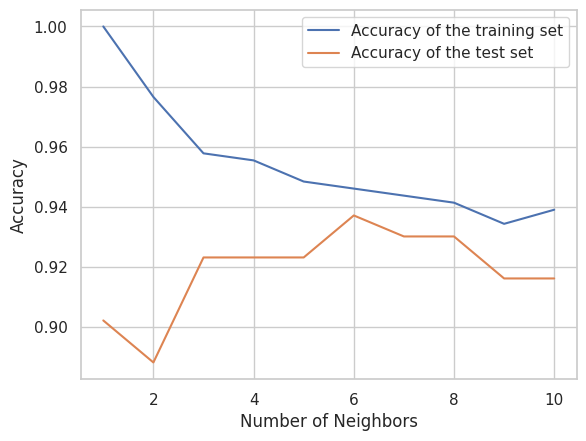

In [20]:
# Resplit the data, with a different randomization (inspired by Muller & Guido ML book - https://www.amazon.com/dp/1449369413/)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,11)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Number of false negatives for 1 neighbors: 8
Number of false negatives for 2 neighbors: 11
Number of false negatives for 3 neighbors: 5
Number of false negatives for 4 neighbors: 6
Number of false negatives for 5 neighbors: 4
Number of false negatives for 6 neighbors: 4
Number of false negatives for 7 neighbors: 4
Number of false negatives for 8 neighbors: 4
Number of false negatives for 9 neighbors: 4
Number of false negatives for 10 neighbors: 4


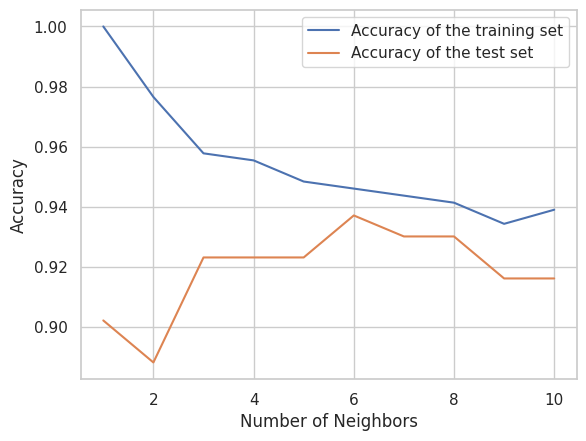

In [21]:
from sklearn.metrics import confusion_matrix

# Resplit the data, with a different randomization
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,11)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    false_negatives = fn
    print(f"Number of false negatives for {n_neighbors} neighbors: {false_negatives}")
    
# Visualize results
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Most Interesting False Positives:


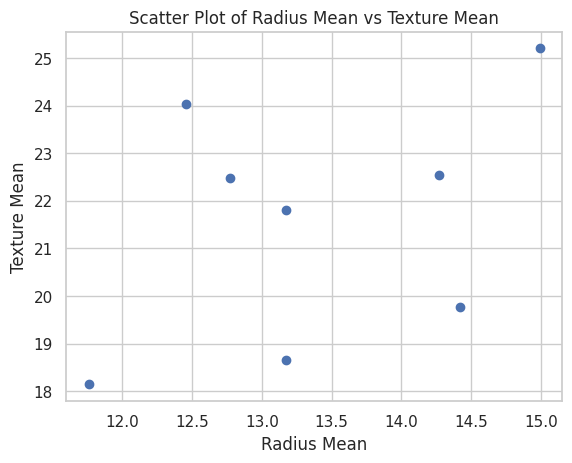

Most Interesting False Negatives:


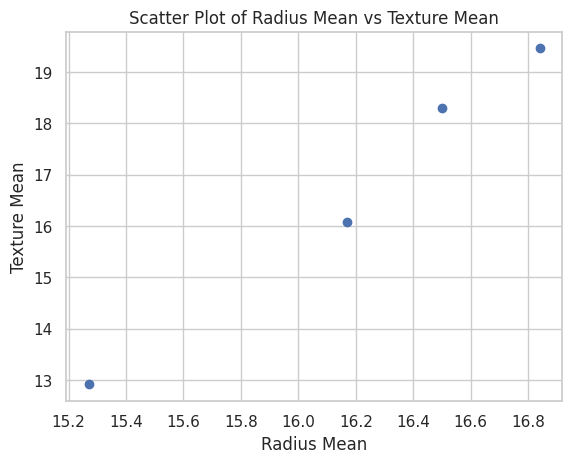

In [23]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Find the indices of false positives and false negatives
fp_indices = []
fn_indices = []
for i in range(len(y_test)):
    if list(y_test)[i] == 0 and y_pred[i] == 1:
        fp_indices.append(i)
    elif list(y_test)[i] == 1 and y_pred[i] == 0:
        fn_indices.append(i)

column_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]


X_test = pd.DataFrame(X_test, columns=column_names)
# Get the actual data points for false positives and false negatives
fp_data = X_test.iloc[fp_indices]
fn_data = X_test.iloc[fn_indices]

# Print the most interesting false positives
print("Most Interesting False Positives:")
# print(fp_data)
import matplotlib.pyplot as plt

plt.scatter(fp_data["radius_mean"], fp_data["texture_mean"])
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.show()

# Print the most interesting false negatives
print("Most Interesting False Negatives:")
# print(fn_data)
plt.scatter(fn_data["radius_mean"], fn_data["texture_mean"])
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.show()

## Logistic **Regression**

In [25]:
# load the data I used url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = data = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df = pd.read_csv(url, header=None,names=column_names)
# get for missing values if has
missing_values = df.isnull().sum()
column_names = ["id", "diagnosis"] + [f"{attr}_{stat}" for attr in ("radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension") for stat in ("mean", "se", "worst")]
df = pd.read_csv(url, header=None, names=column_names)
selected_features = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean"]
plot_data = df[selected_features]

X = df.drop(["id", "diagnosis"], axis=1)
y = df["diagnosis"].map({"M": 1, "B": 0})

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# get predictions and evaluate the model
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]
# ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# plt.figure()
# plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
# plt.plot([0, 1], [0, 1], "r--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver Operating Characteristic (ROC) Curve")
# plt.legend(loc="lower right")
# plt.show()

# matrix heatmap
# conf_mat = confusion_matrix(y_test, y_pred)
# plt.figure()
# sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix Heatmap")
# plt.show()
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1-score:", f1_score(y_test, y_pred))
# print("AUC-ROC:", roc_auc_score(y_test, y_proba))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



LR_accuracy =  accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
LR_recall = recall_score(y_test, y_pred)
LR_f1_score = f1_score(y_test, y_pred)
LR_AUC_ROC = roc_auc_score(y_test, y_proba)
LR_Classification_Report = classification_report(y_test, y_pred)
LR_Confusion_Matrix = confusion_matrix(y_test, y_pred)
# False negatives
false_negatives = LR_Confusion_Matrix[1][0]
print("False Negatives:", false_negatives)

False Negatives: 2


In [26]:


# set the number of folds for cross validation
n_folds = 10

# create a KFold object
kfold = KFold(n_splits=n_folds, shuffle=True)


# initialize the list to store the accuracy scores
accuracy_scores = []

# loop over the folds
for train_index, test_index in kfold.split(X):
    # get the training and testing data for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # train the Logistic Regression model on the current fold
    log_reg = LogisticRegression(max_iter=10000, random_state=42)
    log_reg.fit(X_train, y_train)
    
    # get predictions and evaluate the model
    y_pred = log_reg.predict(X_test)
    y_proba = log_reg.predict_proba(X_test)[:, 1]
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# calculate the mean accuracy score
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy:", mean_accuracy)


Mean accuracy: 0.9560776942355889


Most Interesting False Positives:


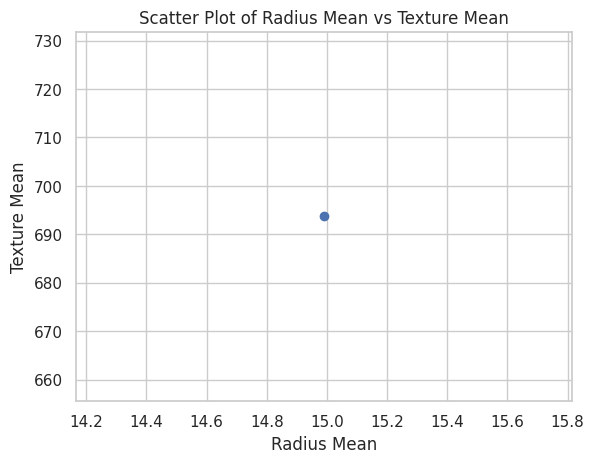

Most Interesting False Negatives:


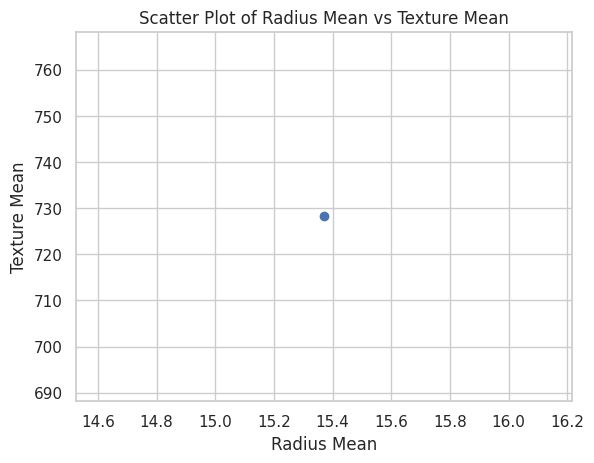

In [28]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Find the indices of false positives and false negatives
fp_indices = []
fn_indices = []
for i in range(len(y_test)):
    if list(y_test)[i] == 0 and y_pred[i] == 1:
        fp_indices.append(i)
    elif list(y_test)[i] == 1 and y_pred[i] == 0:
        fn_indices.append(i)

# Get the actual data points for false positives and false negatives
fp_data = X_test.iloc[fp_indices]
fn_data = X_test.iloc[fn_indices]

# Print the most interesting false positives
print("Most Interesting False Positives:")
# print(fp_data)
import matplotlib.pyplot as plt

plt.scatter(fp_data["radius_mean"], fp_data["texture_mean"])
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.show()

# Print the most interesting false negatives
print("Most Interesting False Negatives:")
plt.scatter(fn_data["radius_mean"], fn_data["texture_mean"])
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.show()


### Support Vector **Machine**

In [ ]:

# import required libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

import pandas as pd


# Load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = data = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
breastCancerData = pd.read_csv(url, header=None,names=column_names)

# replacing values classes M and B with {0, 1}
breastCancerData['diagnosis'].replace(['M', 'B'],[1, 0], inplace=True)

pd.set_option('display.max_columns', None)

X = breastCancerData.drop(['diagnosis', 'id', 'fractal_dimension_worst'], axis=1)
y = breastCancerData['diagnosis']

breastCancerData.head()


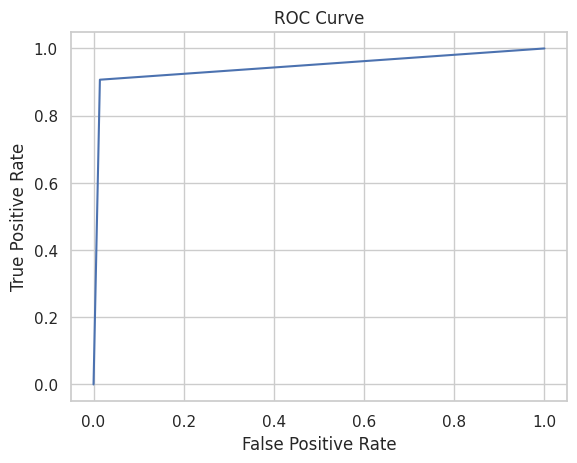

False Negatives: 4


In [30]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier
clf = svm.SVC(kernel='linear', C=1)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
svm_accuracy = clf.score(X_test, y_test)
# print("Accuracy:", svm_accuracy)

# Calculate the precision and recall
svm_precision = precision_score(y_test, y_pred, average='macro')
svm_recall = recall_score(y_test, y_pred, average='macro')

# print("Precision:", svm_precision)
# print("Recall:", svm_recall)

# The ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
false_negatives = sum((y_pred == 0) & (y_test == 1))
print("False Negatives:", false_negatives)

Most Interesting False Positives:


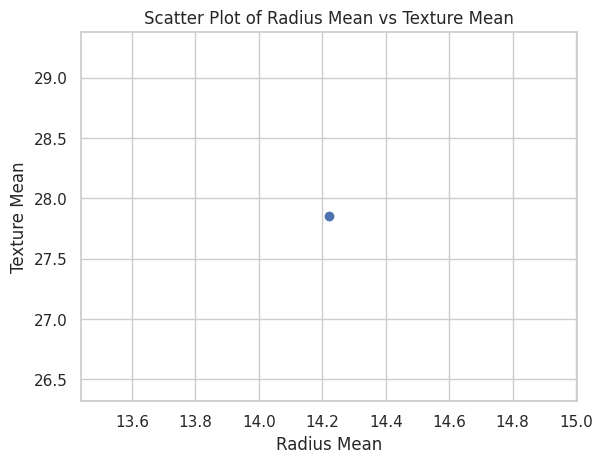

Most Interesting False Negatives:
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
73         13.80         15.79           90.43      584.1          0.10070   
39         13.48         20.82           88.40      559.2          0.10160   
255        13.96         17.05           91.43      602.4          0.10960   
86         14.48         21.46           94.25      648.2          0.09444   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
73            0.12800         0.07789              0.05069         0.1662   
39            0.12550         0.10630              0.05439         0.1720   
255           0.12790         0.09789              0.05246         0.1908   
86            0.09947         0.12040              0.04938         0.2075   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
73                  0.06566     0.2787      0.6205         1.957    23.35   
39                  0.06419     0.2

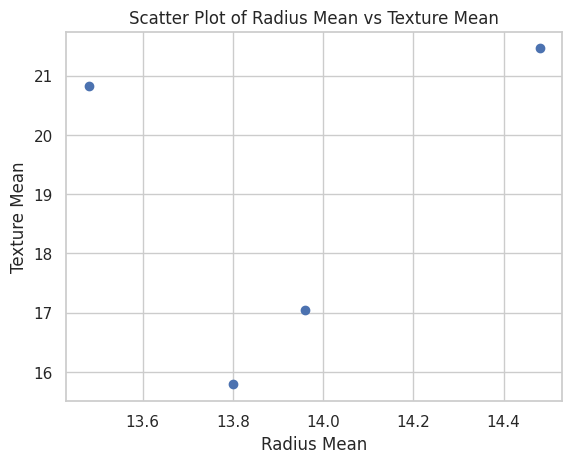

In [31]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Find the indices of false positives and false negatives
fp_indices = []
fn_indices = []
for i in range(len(y_test)):
    if list(y_test)[i] == 0 and y_pred[i] == 1:
        fp_indices.append(i)
    elif list(y_test)[i] == 1 and y_pred[i] == 0:
        fn_indices.append(i)

# Get the actual data points for false positives and false negatives
fp_data = X_test.iloc[fp_indices]
fn_data = X_test.iloc[fn_indices]

# Print the most interesting false positives
print("Most Interesting False Positives:")
# print(fp_data)
import matplotlib.pyplot as plt

plt.scatter(fp_data["radius_mean"], fp_data["texture_mean"])
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.show()

# Print the most interesting false negatives
print("Most Interesting False Negatives:")
print(fn_data)
plt.scatter(fn_data["radius_mean"], fn_data["texture_mean"])
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.show()

Comparison of different methods:

In [32]:
print("Logistic Regression")
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)
print("Recall:", LR_recall)
# print(LR_f1_score)
# print(LR_AUC_ROC)
# print(LR_Classification_Report)
# print(LR_Confusion_Matrix)

#SVM
print("\nSVM")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)


#KNN
print("\nKNN")
print("Accuracy:", KNN_accuracy)


#Neural Network
print("\nNeural Network")
print("Accuracy:", NN_accuracy)

Logistic Regression
Accuracy: 0.9766081871345029
Precision: 0.9682539682539683
Recall: 0.9682539682539683

SVM
Accuracy: 0.956140350877193
Precision: 0.960472972972973
Recall: 0.9464461185718964

KNN
Accuracy: 0.9300699300699301

Neural Network
Accuracy: 100.0
